In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("housing.csv")

In [3]:
# data.head()

In [4]:
data.info() # Checking how many values are null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
data.dropna(inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [7]:
from sklearn.model_selection import  train_test_split

X = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

In [8]:
# X

In [9]:
# y

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2) # 20% data for testing

In [11]:
train_data = X_train.join(y_train)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
18603,-122.08,37.15,23.0,506.0,96.0,264.0,89.0,7.1366,NEAR OCEAN,273900.0
12956,-121.30,38.69,21.0,6575.0,1105.0,3358.0,1098.0,4.0739,INLAND,115400.0
1752,-122.34,37.96,15.0,6487.0,1717.0,3408.0,1560.0,2.1991,NEAR BAY,133300.0
8395,-118.37,33.96,26.0,138.0,23.0,100.0,20.0,4.8750,<1H OCEAN,175000.0
6264,-117.96,34.05,32.0,1993.0,388.0,1385.0,380.0,3.7258,<1H OCEAN,181900.0
...,...,...,...,...,...,...,...,...,...,...
9310,-122.53,37.98,32.0,2390.0,336.0,810.0,354.0,8.5759,NEAR BAY,500001.0
381,-122.16,37.74,46.0,1029.0,181.0,567.0,211.0,3.4844,NEAR BAY,129500.0
15562,-116.97,33.13,10.0,5149.0,851.0,2177.0,783.0,6.7957,<1H OCEAN,287500.0
18415,-121.84,37.27,17.0,2795.0,482.0,1904.0,506.0,5.0186,<1H OCEAN,250800.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

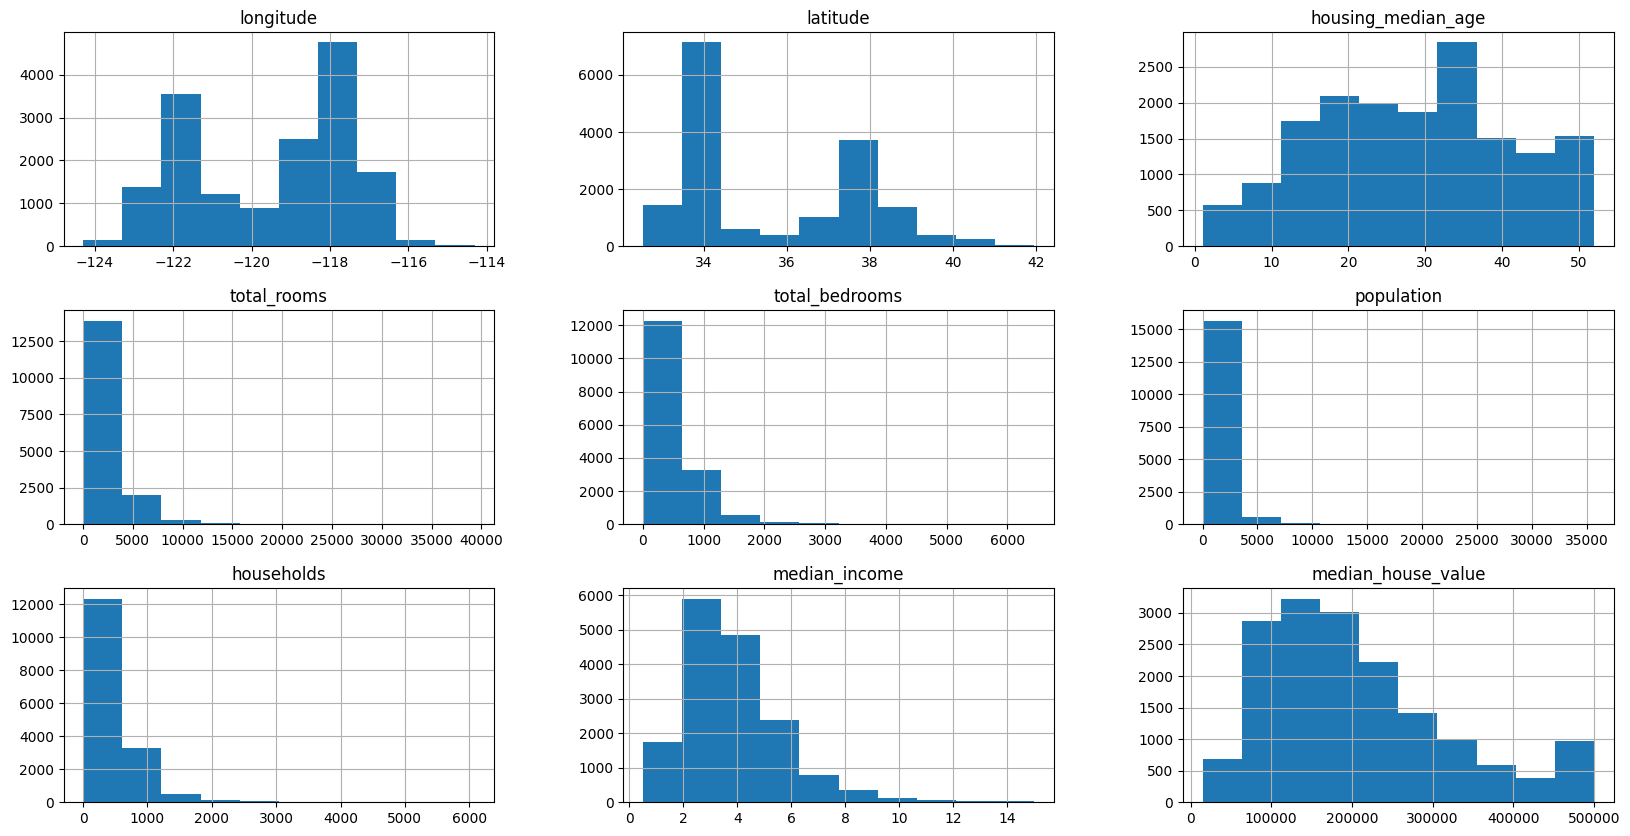

In [12]:
train_data.hist(figsize=(20,10))

<Axes: >

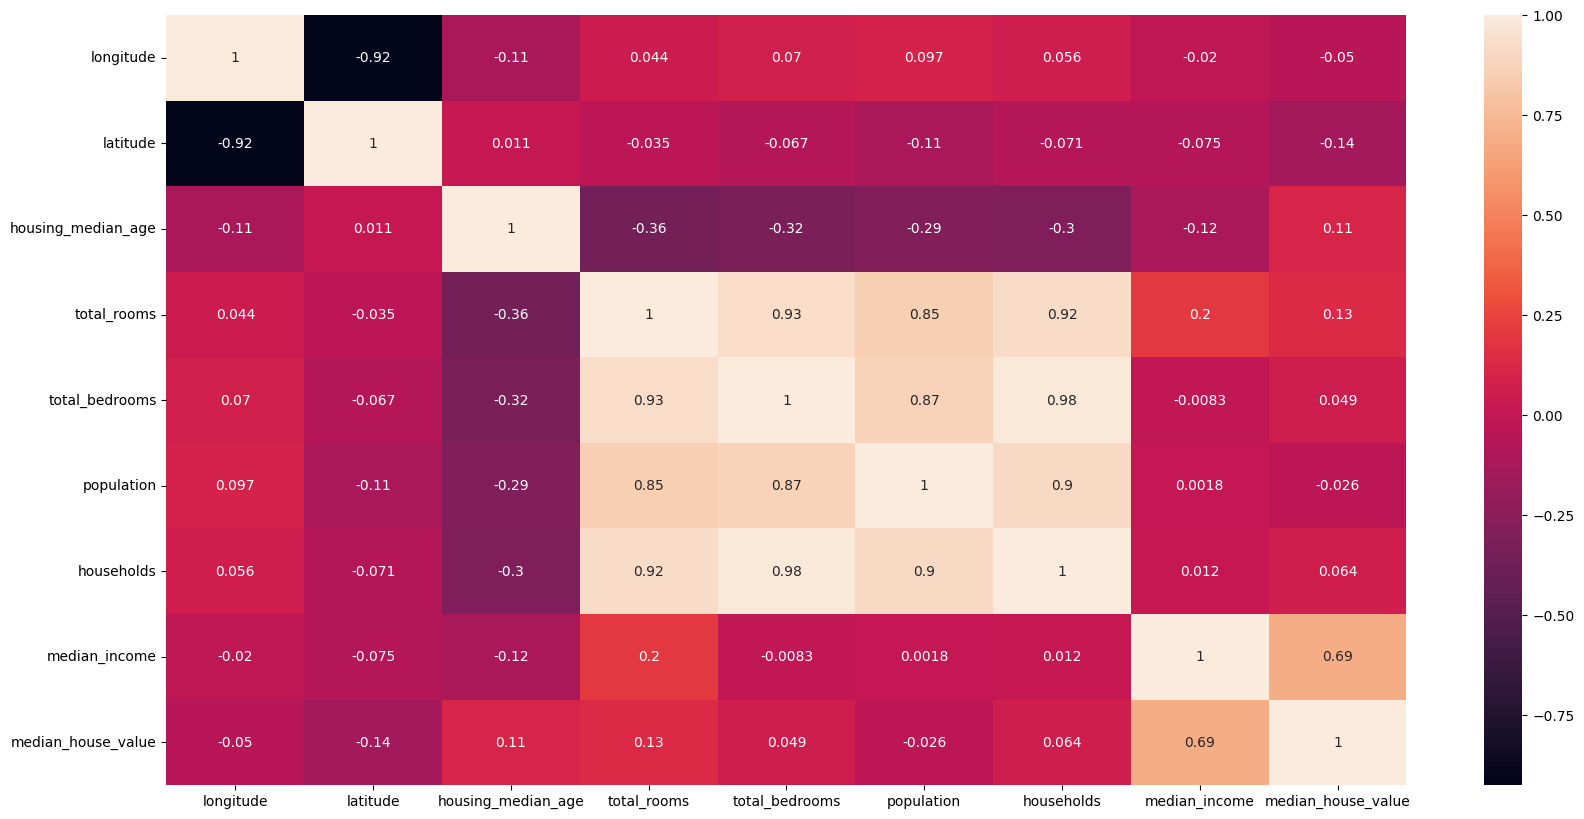

In [13]:
plt.figure(figsize=(20,10))
sns.heatmap(train_data.corr(numeric_only=True), annot=True)

In [14]:
train_data["total_rooms"] = np.log(train_data["total_rooms"] + 1)
train_data["total_bedrooms"] = np.log(train_data["total_bedrooms"] + 1)
train_data["population"] = np.log(train_data["population"] + 1)
train_data["households"] = np.log(train_data["households"] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

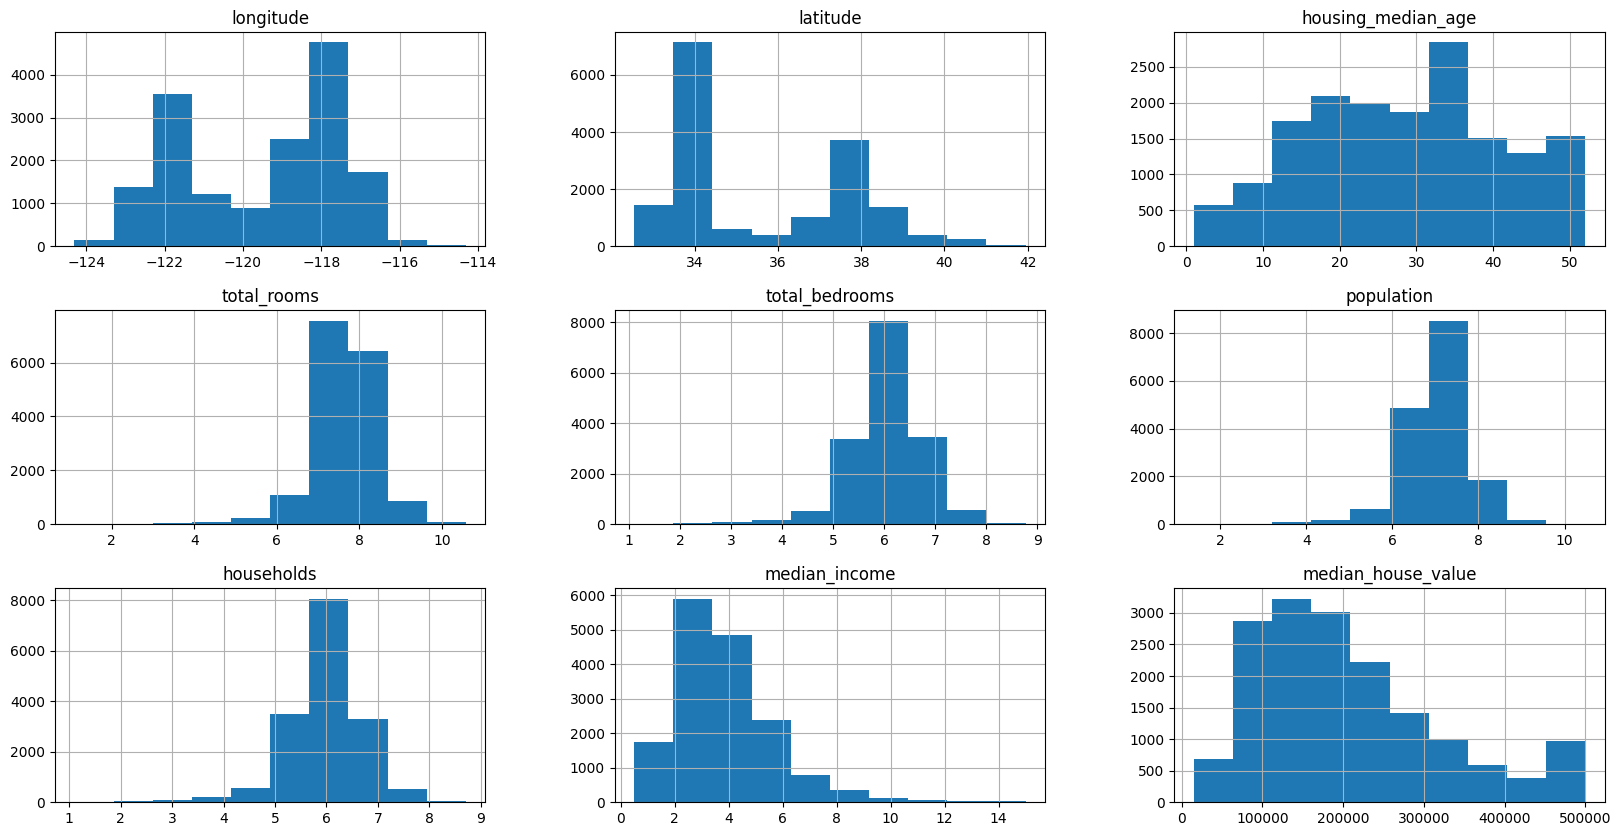

In [15]:
train_data.hist(figsize=(20,10))

In [16]:
train_data = train_data.join(pd.get_dummies(train_data["ocean_proximity"]).astype(int)).drop(["ocean_proximity"], axis=1)



In [17]:
train_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
18603,-122.08,37.15,23.0,6.228511,4.574711,5.579730,4.499810,7.1366,273900.0,0,0,0,0,1
12956,-121.30,38.69,21.0,8.791182,7.008505,8.119399,7.002156,4.0739,115400.0,0,1,0,0,0
1752,-122.34,37.96,15.0,8.777710,7.448916,8.134174,7.353082,2.1991,133300.0,0,0,0,1,0
8395,-118.37,33.96,26.0,4.934474,3.178054,4.615121,3.044522,4.8750,175000.0,1,0,0,0,0
6264,-117.96,34.05,32.0,7.597898,5.963579,7.234177,5.942799,3.7258,181900.0,1,0,0,0,0


<Axes: >

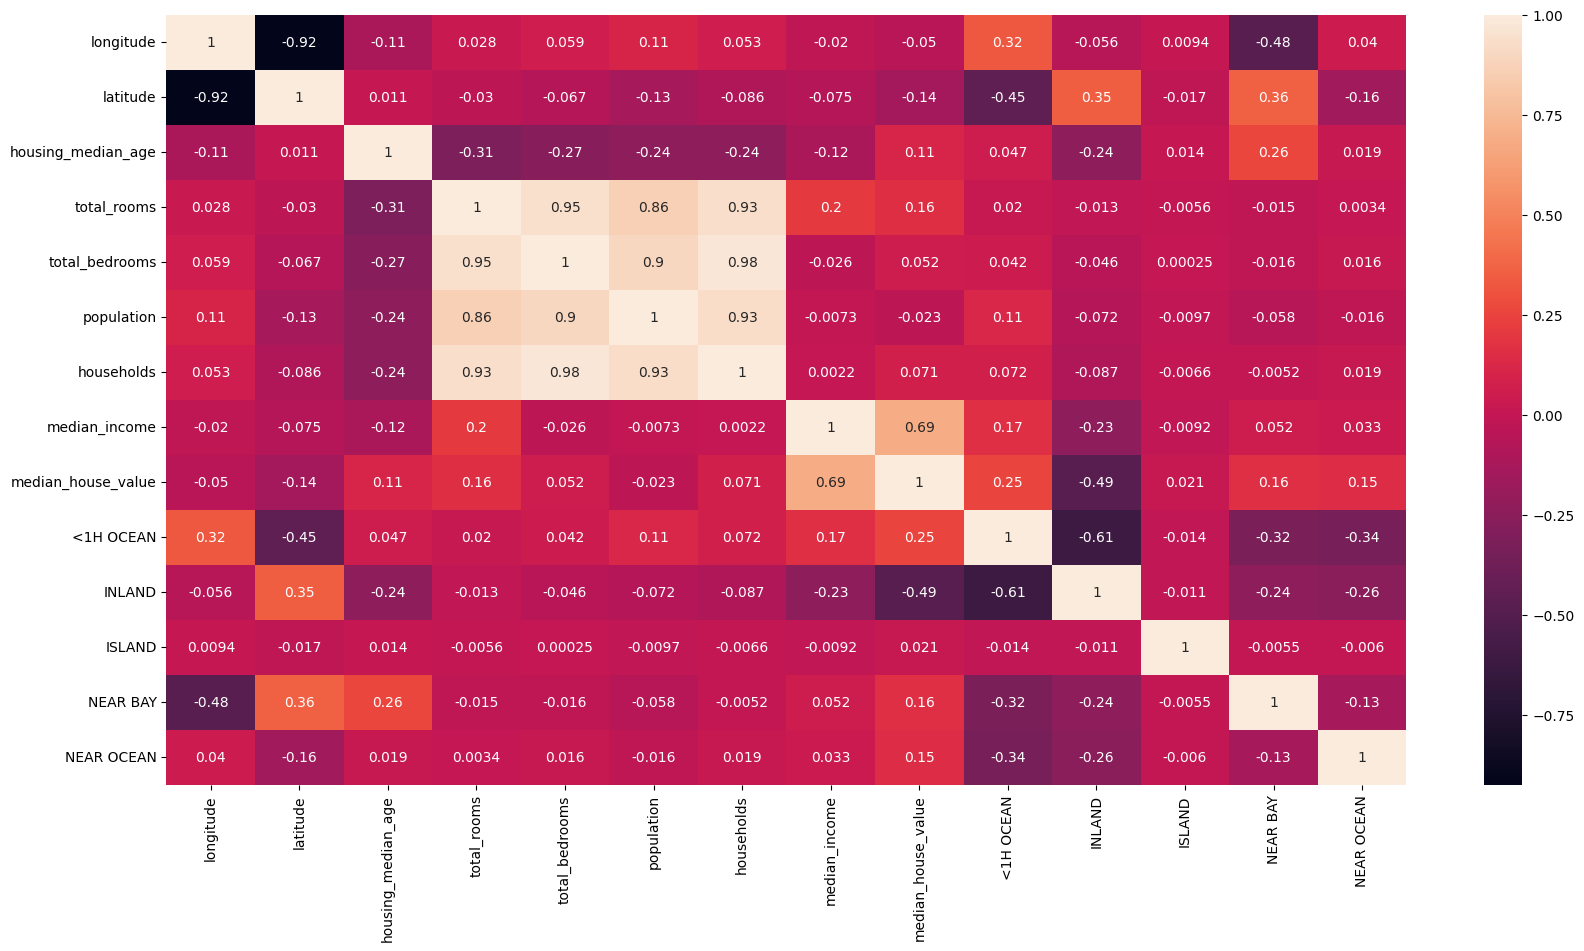

In [18]:
plt.figure(figsize=(20,10))
sns.heatmap(train_data.corr(numeric_only=True), annot=True)

<Axes: xlabel='latitude', ylabel='longitude'>

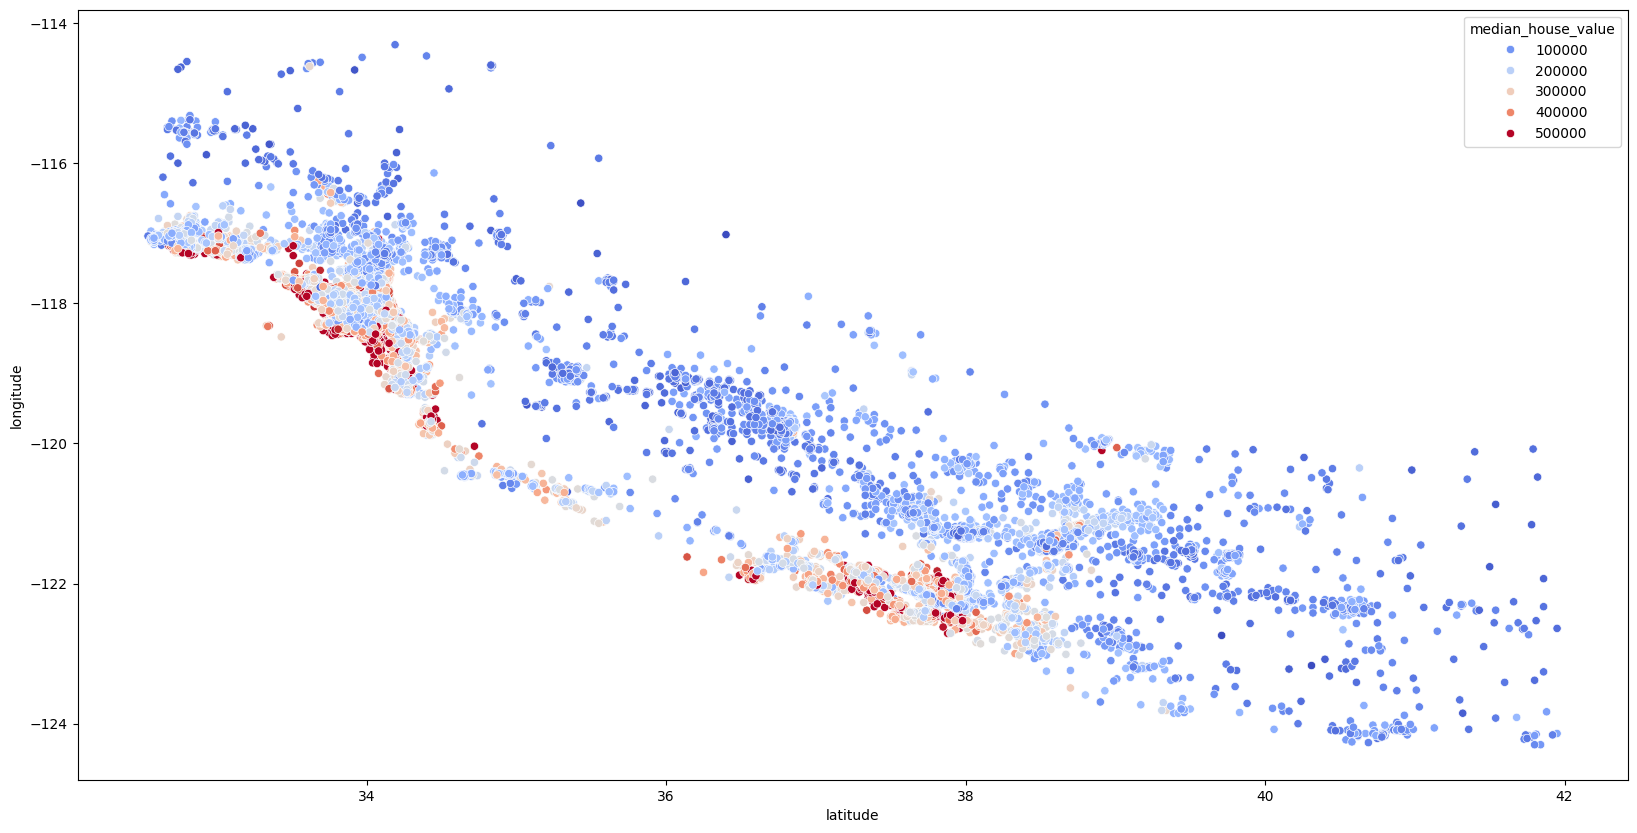

In [19]:
plt.figure(figsize=(20,10))
sns.scatterplot(x="latitude", y="longitude", data=train_data, hue="median_house_value", palette="coolwarm")


In [20]:
train_data["bedroom_ratio"] = train_data["total_bedrooms"] / train_data["total_rooms"]
train_data["household_rooms"] = train_data["total_rooms"] / train_data["households"]

train_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
18603,-122.08,37.15,23.0,6.228511,4.574711,5.579730,4.499810,7.1366,273900.0,0,0,0,0,1,0.734479,1.384172
12956,-121.30,38.69,21.0,8.791182,7.008505,8.119399,7.002156,4.0739,115400.0,0,1,0,0,0,0.797220,1.255496
1752,-122.34,37.96,15.0,8.777710,7.448916,8.134174,7.353082,2.1991,133300.0,0,0,0,1,0,0.848617,1.193746
8395,-118.37,33.96,26.0,4.934474,3.178054,4.615121,3.044522,4.8750,175000.0,1,0,0,0,0,0.644051,1.620771
6264,-117.96,34.05,32.0,7.597898,5.963579,7.234177,5.942799,3.7258,181900.0,1,0,0,0,0,0.784899,1.278505


<Axes: >

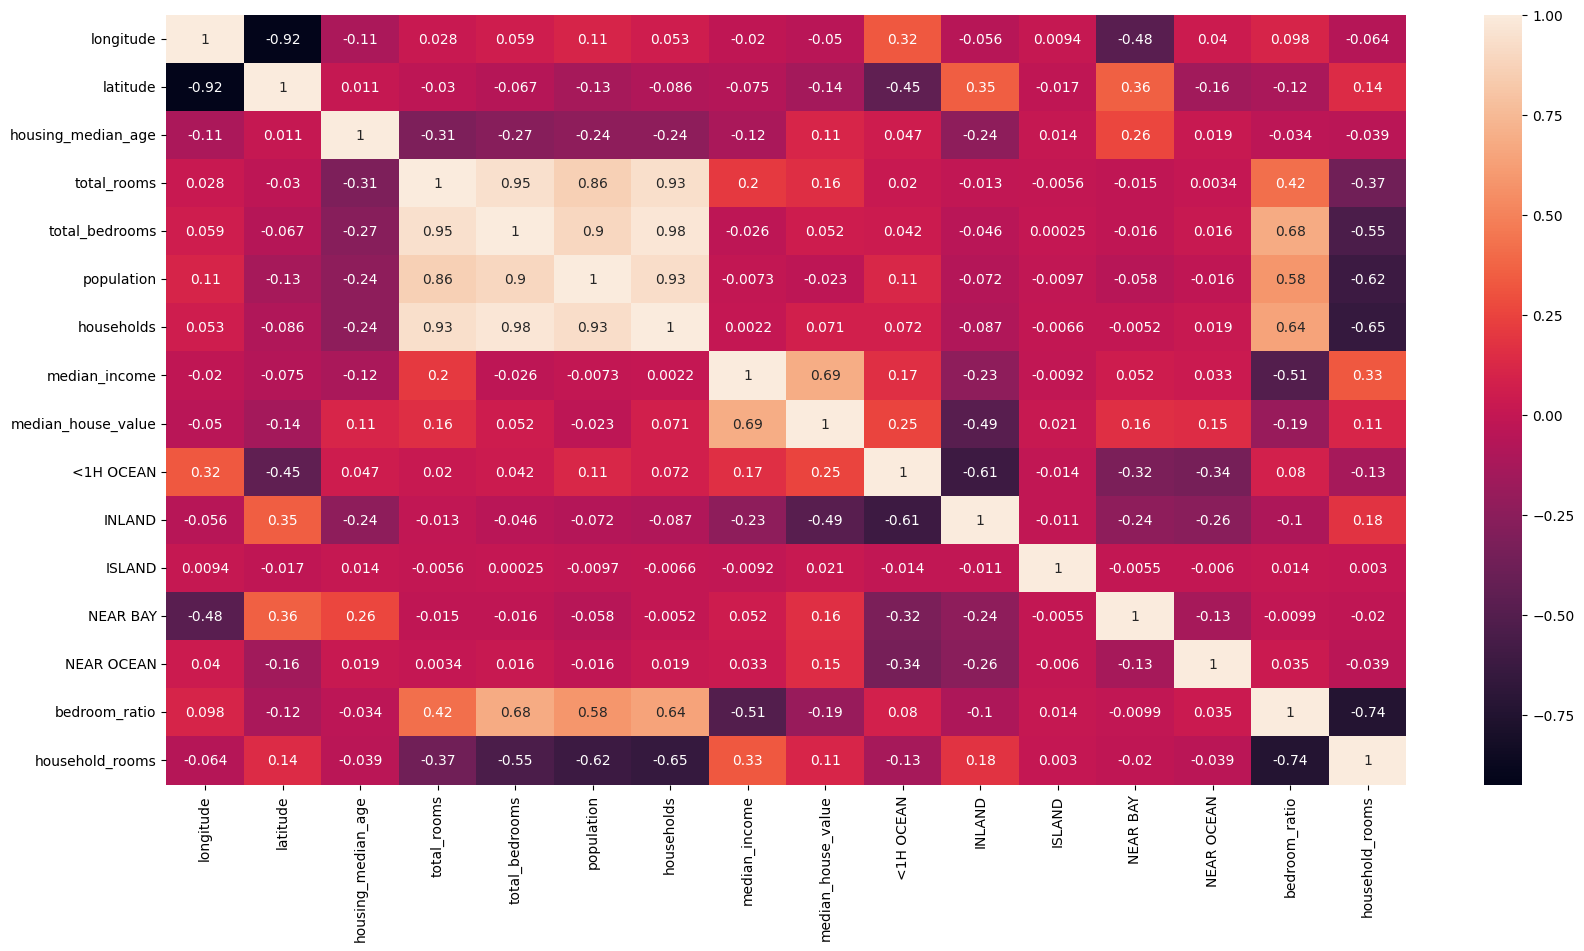

In [21]:
plt.figure(figsize=(20,10))
sns.heatmap(train_data.corr(numeric_only=True), annot=True)

In [22]:
test_data = X_test.join(y_test)

test_data["total_rooms"] = np.log(test_data["total_rooms"] + 1)
test_data["total_bedrooms"] = np.log(test_data["total_bedrooms"] + 1)
test_data["population"] = np.log(test_data["population"] + 1)
test_data["households"] = np.log(test_data["households"] + 1)

test_data = test_data.join(pd.get_dummies(test_data["ocean_proximity"]).astype(int)).drop(["ocean_proximity"], axis=1)

test_data["bedroom_ratio"] = test_data["total_bedrooms"] / test_data["total_rooms"]
test_data["household_rooms"] = test_data["total_rooms"] / test_data["households"]



In [23]:
X_test, y_test = test_data.drop(["median_house_value"],axis=1) , test_data["median_house_value"]

In [24]:
# PERFORMING LINEAR REGRESSION
from sklearn.linear_model import LinearRegression

X_train, y_train = train_data.drop(["median_house_value"],axis=1) , train_data["median_house_value"]

reg = LinearRegression()

reg.fit(X_train, y_train)

LinearRegression()

In [25]:
reg.score(X_test, y_test)

0.6881805726386843

In [26]:
# PERFORMING RANDOM FOREST MODEL

In [27]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(X_train, y_train)

RandomForestRegressor()

In [28]:
forest.score(X_test, y_test)

0.8144277577128051

In [29]:
# from sklearn.model_selection import GridSearchCV

# forest = RandomForestRegressor()

# param_grid={
#     "n_estimators":[100,200,300],
#    "min_samples_split": [2,4],
#    "max_depth":[None,4,1]
# }

# grid_search = GridSearchCV(forest,param_grid,cv=5,
#                            scoring="neg_mean_squared_error",
#                            return_train_score=True)

# grid_search.fit(X_train_s,Y_train)

In [ ]:


# from sklearn import svm

# model = svm.SVC()

# model.fit(X_train, y_train)
# model.score(X_test, y_test)
